# Detecting Prostate Cancer With AI

I was fortunate enough to acquire an original, never analyzed histopathology dataset of prostate scans. Here, I am simply running a convolutional neural network on the pictures, after resizing. There is not preprocessing, editing, or else. 

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, ZeroPadding2D,\
    Dropout, Input
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
import os
os.chdir('c:/users/nicolas/documents/data/prostate')
from glob import glob
import cv2

In [2]:
# initializing lists and lists of lists
normal, anormal = [], []
cat = [normal, anormal]
str_cat = ['normal', 'anormal']

In [3]:
# importing images
ix, ix_files = 0, 0

for ix, item in enumerate(cat):
    files = glob('{}/*jpg'.format(str_cat[ix]))
    for file in files: 
        ix_files += 1        
        if ix_files%10 == 0:
            print('%i images uploaded.'%(ix_files))
        image = cv2.imread(file, 1)
        item.append(image)
        
total_len = sum(len(c) for c in cat)
            
if ix_files > total_len-20:
        print()
        print('%i images successfully uploaded.'%(total_len))
        
print(); print('\n'.join(['Length of category <{}> is {}'.format(str_cat[i], 
                                len(cat[i])) for i in range(2)]))

10 images uploaded.
20 images uploaded.
30 images uploaded.

33 images successfully uploaded.

Length of category <normal> is 21
Length of category <anormal> is 12


In [6]:
# getting shape
height, width, channels = cat[rand][np.random.randint(len(cat[rand]))].shape
print(f'We have {height} pixels of height, {width} pixels of width, and {channels} channels.')

We have 1920 pixels of height, 2448 pixels of width, and 3 channels.


In [28]:
def shuffle_along_axis(a, axis):
    idx = np.random.rand(*a.shape).argsort(axis=axis)
    return np.take_along_axis(a,idx,axis=axis)

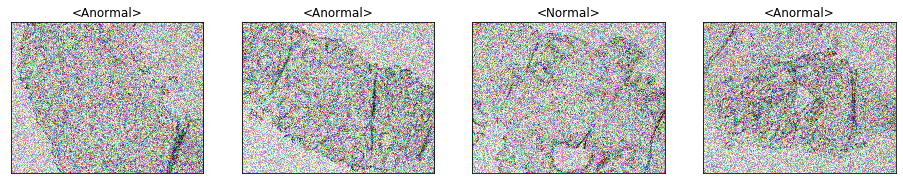

In [40]:
# example pictures
fig = plt.figure(figsize=(20, 20))
for i in range(1, 5):
    plt.subplot(1, 5, i)
    rand = np.random.randint(0, 2)
    ax = plt.imshow(shuffle_along_axis(np.abs(np.minimum(cat[rand][np.random.randint(len(cat[rand]))] + 
                    np.random.randint(-100, 100, (height, width, channels)), 255)), 2))
    plt.title('<{}>'.format(str_cat[rand].capitalize()))
    yticks = plt.xticks([])
    yticks = plt.yticks([])

#### <font color='red'>**PLEASE NOTE:**</font> THE PIXELS ARE ALTERED FOR PRIVACY. ACTUAL PICTURES DIFFER.

In [35]:
# resize to 1/4th
ix = 0
res_normal, res_anormal = [], []
res_cat = [res_normal, res_anormal]
new_height = int(height/4)
new_width = int(width/4)
for inx, item in enumerate(cat):
    for elem in item:
        image = Image.fromarray(elem)
        ix+=1
        if ix % 5 == 0:
            print(str(ix), 'images iterated for resizing')
        img=image.resize((new_height, new_width)) #.save('resized/{}'.format(os.path.splitext(elem)[0] + '.png'))
        res_cat[inx].append(np.array(img))
        
print('\n%i images successfully resized.'%(total_len))

5 images iterated for resizing
10 images iterated for resizing
15 images iterated for resizing
20 images iterated for resizing
25 images iterated for resizing
30 images iterated for resizing

33 images successfully resized.


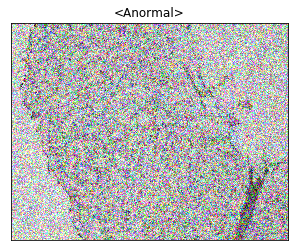

In [43]:
# full sized example
rand = np.random.randint(0, 2)
ax = plt.imshow(shuffle_along_axis(np.abs(np.minimum(cat[rand][np.random.randint(len(cat[rand]))] + 
                    np.random.randint(-100, 100, (height, width, channels)), 255)), 2))
plt.title('<{}>'.format(str_cat[rand].capitalize()))
plt.title('<{}>'.format(str_cat[rand].capitalize()))
yticks = plt.xticks([])
yticks = plt.yticks([])

In [8]:
# separating predictors and targets
X = np.vstack(res_cat).astype(np.float16)
normal_target = [0 for i in range(len(normal))]
anormal_target = [1 for i in range(len(anormal))]
y = np.concatenate([normal_target, anormal_target]).astype(np.float16)

In [9]:
# verifying shape
assert X.shape[1:] == (new_width, new_height, channels), 'The input shape does not \
correspond to the desired shape.'

In [10]:
# rescaling the input
X = np.divide(X, 255)

In [11]:
# changing the format of the target
y = to_categorical(y)

In [12]:
# cross-validation
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=.2)

In [13]:
# creating an input tensor for the neural net
inputs = Input(shape=(X.shape[1], X.shape[2], X.shape[3]))

In [15]:
# building the model
x = ZeroPadding2D((1,1))(inputs)
# x = Conv2D(64, 3, 3, activation='relu')(x)
# x = ZeroPadding2D((1,1))(x)
# x = Conv2D(64, 3, 3, activation='relu')(x)
# x = MaxPooling2D((2,2), strides=(2,2))(x)

# x = ZeroPadding2D((1,1))(x)
x = Conv2D(128, 3, 3, activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(128, 3, 3, activation='relu')(x)
x = MaxPooling2D((2,2), strides=(2,2))(x)

x = ZeroPadding2D((1,1))(x)
x = Conv2D(256, 3, 3, activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(256, 3, 3, activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(256, 3, 3, activation='relu')(x)

x = ZeroPadding2D((1,1))(x)
x = Conv2D(512, 3, 3, activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(512, 3, 3, activation='relu')(x)
x = ZeroPadding2D((1,1))(x) 
x = Conv2D(512, 3, 3, activation='relu')(x)

x = ZeroPadding2D((1,1))(x) 
x = Conv2D(512, 3, 3, activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(512, 3, 3, activation='relu')(x)
x = ZeroPadding2D((1,1))(x)
x = Conv2D(512, 3, 3, activation='relu')(x)

x = Flatten()(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.5)(x)
# x = Dense(4096, activation='relu')(x)
# x = Dropout(0.5)(x)
x = Dense(2, activation='sigmoid', name='output')(x)

In [16]:
# predictions
predictions = x

In [17]:
# finalizing the model
model = Model(inputs=inputs, outputs=predictions)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 612, 480, 3)]     0         
_________________________________________________________________
zero_padding2d_11 (ZeroPaddi (None, 614, 482, 3)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 204, 160, 128)     3584      
_________________________________________________________________
zero_padding2d_12 (ZeroPaddi (None, 206, 162, 128)     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 68, 54, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 27, 128)       0         
_________________________________________________________________
zero_padding2d_13 (ZeroPaddi (None, 36, 29, 128)       0     

In [20]:
# compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
# training the model
hist = model.fit(xtrain, ytrain,
                 epochs=10,
                 batch_size=1,
                 validation_data=[xtest, ytest])

Train on 26 samples, validate on 7 samples
Epoch 1/10
26/26 [==============================] - 5s 201ms/sample - loss: 0.7222 - acc: 0.6154 - val_loss: 0.6849 - val_acc: 0.5714
Epoch 2/10
26/26 [==============================] - 2s 78ms/sample - loss: 0.6683 - acc: 0.6538 - val_loss: 0.6866 - val_acc: 0.5714
Epoch 3/10
26/26 [==============================] - 2s 78ms/sample - loss: 0.6620 - acc: 0.6538 - val_loss: 0.6879 - val_acc: 0.5714
Epoch 4/10
26/26 [==============================] - 2s 78ms/sample - loss: 0.6543 - acc: 0.6538 - val_loss: 0.6919 - val_acc: 0.5714
Epoch 5/10
26/26 [==============================] - 2s 77ms/sample - loss: 0.6556 - acc: 0.6538 - val_loss: 0.6951 - val_acc: 0.5714
Epoch 6/10
26/26 [==============================] - 2s 77ms/sample - loss: 0.6565 - acc: 0.6538 - val_loss: 0.7111 - val_acc: 0.5714
Epoch 7/10
26/26 [==============================] - 2s 77ms/sample - loss: 0.6568 - acc: 0.6538 - val_loss: 0.6890 - val_acc: 0.5714
Epoch 8/10
26/26 [=======

In [22]:
pct = int(y[:,0].sum()/len(y)*100)

In [23]:
print('Bottom accuracy:', str(pct)+'% or', str(100-pct) + '%.')

Bottom accuracy: 63% or 37%.


With this strategy, it doesn't seem like a convolutional neural net based on the VGG-19 can accurately detect prostate cancer. This was a preliminary run with pictures with different zooms, that were mostly far too zoomed out. I will need to consult the physicians and demand a format that is uniform.